Student: Tuyen Do <br>
Class: Information Storage & Retrieval <br>
Professor: KC Santosh <br>
                                                 Project 2 <br>

In [2]:
import os
import string
import collections
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from matplotlib import pyplot as plt
from wordcloud import WordCloud

The process_text functions is used as tokenizer which include both tokenize and normalize. Documents are parsed and removed all punctuations, digit and special characters.Then I apply the snowball stemmer

In [3]:
def process_text(text, stem=True):
    # Tokenize text and stem words removing punctuation 
    table = str.maketrans(dict.fromkeys(string.punctuation))
    text = text.translate(table)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]
    if stem:
        stemmer = SnowballStemmer("english")
        tokens = [stemmer.stem(t) for t in tokens]
    return tokens

Read four documents in texts folder and append them in an array

In [4]:
texts = []
clustersNum = 2
for text in os.listdir("texts"):
    with open("texts/"+text) as f:
        texts.append(f.read())

Generate the document term frequency and tf-idf matrix with sklearn library

In [6]:
tfVectorizer = TfidfVectorizer(tokenizer=process_text,
                                        stop_words=stopwords.words('english'),
                                        max_df=0.5,
                                        min_df=0.1,
                                        lowercase=True)
tfIdfModel = tfVectorizer.fit_transform(texts)

In [7]:
vectorizer = CountVectorizer(tokenizer=process_text,
                                        stop_words=stopwords.words('english'),
                                        max_df=0.5,
                                        min_df=0.1,
                                        lowercase=True)
df = vectorizer.fit_transform(texts)
tf = [sum(x) for x in zip(*df.toarray())]

In [8]:
len(tf)

6496

In [9]:
termList = vectorizer.get_feature_names()
popTerm = []
popTermFre = []
indPopTerm = []
freq = {}
popDf = []
for i,v in enumerate(tf):
    if v > 35:
        popTerm.append(termList[i])
        popTermFre.append(v)
        indPopTerm.append(i)
        freq[termList[i]] = v
        popDf.append(df.transpose().toarray()[i])

In [10]:
popTerm

['bank',
 'beginitem',
 'bgfactsaint',
 'central',
 'enditem',
 'financ',
 'food',
 'good',
 'minist',
 'presid',
 'prime',
 'product',
 'selfsuffici',
 'transport']

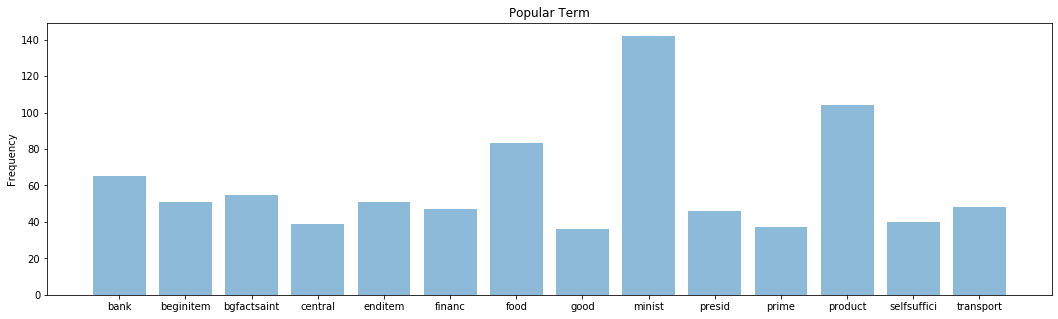

In [11]:
xPos = range(len(popTerm))
f, ax = plt.subplots(figsize=(18,5))
plt.bar(xPos, popTermFre, align='center', alpha=0.5)
plt.xticks(xPos, popTerm)
plt.ylabel('Frequency')
plt.title('Popular Term')
plt.show()

In [12]:
wordcloud = WordCloud(background_color='white',
                      width=2500,
                      height=2000
                     ).generate_from_frequencies(freq)

In [13]:
freq

{'bank': 65,
 'beginitem': 51,
 'bgfactsaint': 55,
 'central': 39,
 'enditem': 51,
 'financ': 47,
 'food': 83,
 'good': 36,
 'minist': 142,
 'presid': 46,
 'prime': 37,
 'product': 104,
 'selfsuffici': 40,
 'transport': 48}

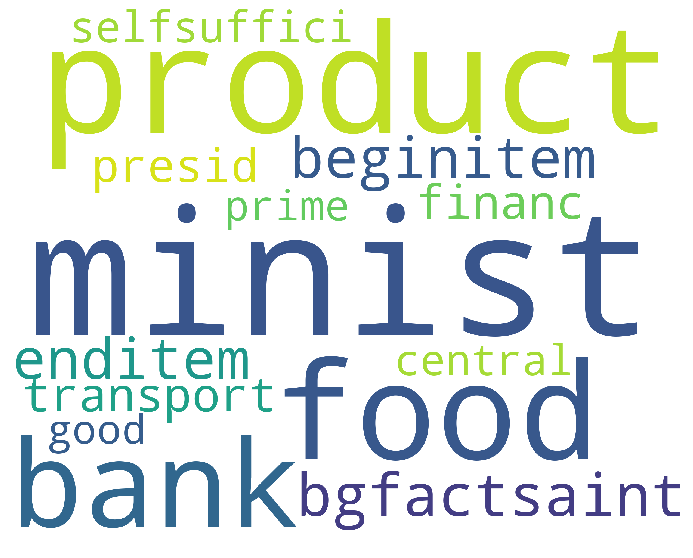

In [254]:
fig, ax = plt.subplots(figsize=(15, 10)) # set size
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

In [255]:
km_model = KMeans(n_clusters=clustersNum)
km_model.fit(df.transpose())
clusters = km_model.labels_.tolist()

In [14]:
df.shape

(4, 6496)

In [256]:
colors = ['#646464' if x == 0 else '#306998' for x in clusters]

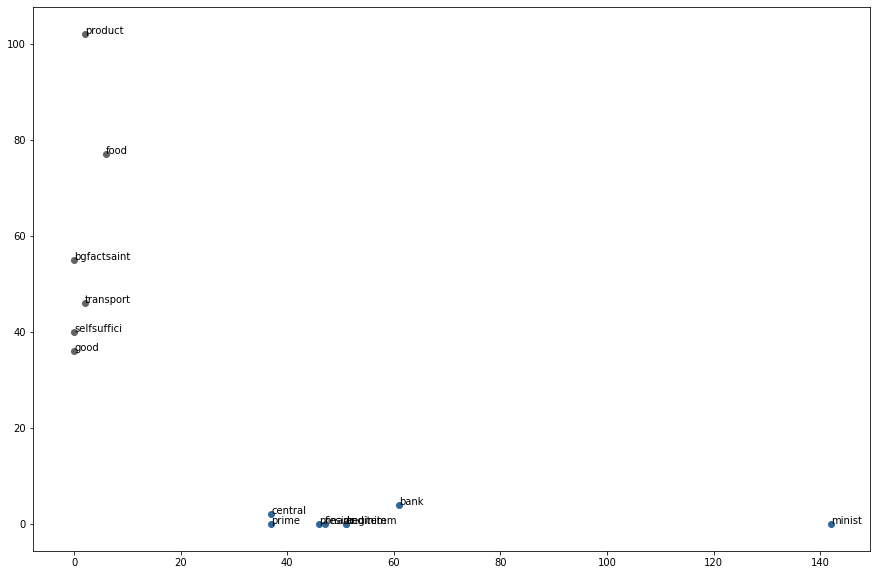

In [273]:
fig, ax = plt.subplots(figsize=(15, 10)) # set size
for i in indPopTerm:
    ax.scatter(df.toarray()[1][i],df.toarray()[3][i], c=colors[i])
    ax.annotate(termList[i], (df.toarray()[1][i], df.toarray()[3][i]))
plt.show()

Calculate the euclidean distance between the words

In [258]:
dist = euclidean_distances(popDf)

In [260]:
linkage_matrix = ward(dist)

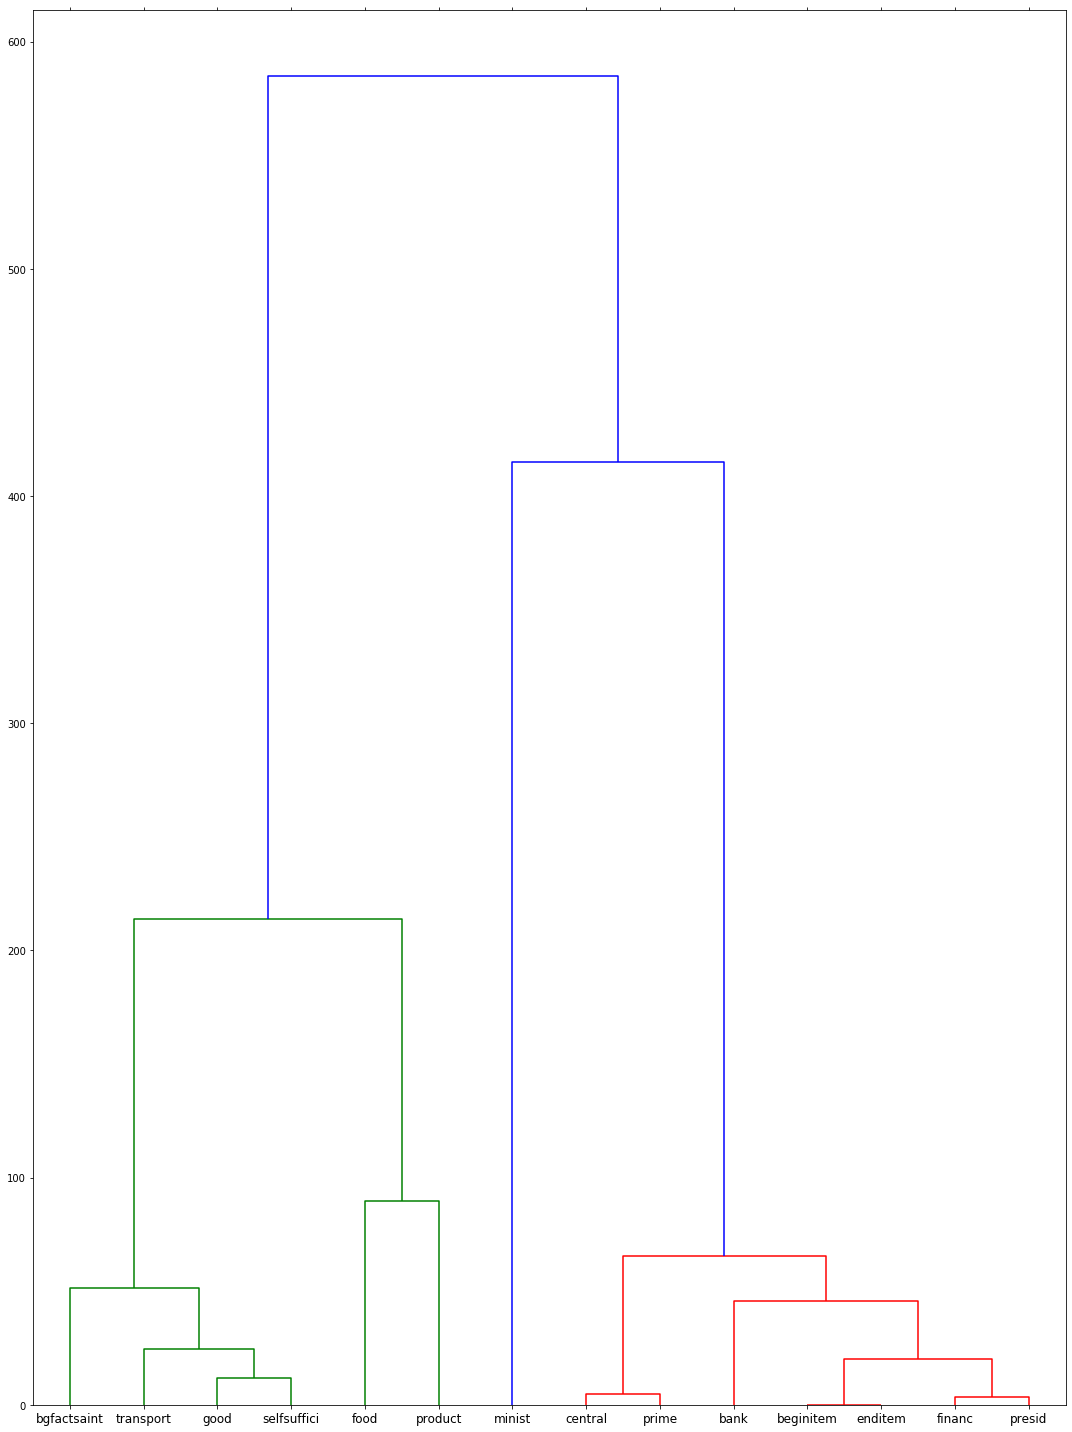

In [261]:
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="top", labels=popTerm)

plt.tick_params(\
    axis= 'x',          
    which='both',     
    bottom='off',      
    top='off',        
    labelbottom='off')

plt.tight_layout()
plt.show()
#save figure as ward_clusters
#plt.savefig('ward_clusters.png', dpi=200)